In [1]:
#Authors: 
#Ayush Sharma (Delhi Technological University)
#Mrigank Sondhi (Delhi Technological University)

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from keras import regularizers

In [3]:
raw_data = pd.read_csv('jm1.csv')
raw_data.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17,36,112,86,13,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17,135,329,271,5,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11,16,76,50,7,True


In [4]:
X = raw_data[raw_data.columns[0:21]]
Y = pd.DataFrame(raw_data[raw_data.columns[21]])

In [5]:
#Values having '?': uniq_Op, uniq_Opnd, total_Op, total_Opnd, branchCount
Y = Y[X['branchCount'] != '?']
X = X[X['branchCount'] != '?']
X.reset_index(inplace = True, drop = True)
Y.reset_index(inplace = True, drop = True)
Y = Y['defects']

In [6]:
for i in range(Y.size):
  if (Y[i] == True):
    Y.loc[i] = 1.0
  else:
    Y.loc[i] = 0.0

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10880 entries, 0 to 10879
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10880 non-null  float64
 1   v(g)               10880 non-null  float64
 2   ev(g)              10880 non-null  float64
 3   iv(g)              10880 non-null  float64
 4   n                  10880 non-null  float64
 5   v                  10880 non-null  float64
 6   l                  10880 non-null  float64
 7   d                  10880 non-null  float64
 8   i                  10880 non-null  float64
 9   e                  10880 non-null  float64
 10  b                  10880 non-null  float64
 11  t                  10880 non-null  float64
 12  lOCode             10880 non-null  int64  
 13  lOComment          10880 non-null  int64  
 14  lOBlank            10880 non-null  int64  
 15  locCodeAndComment  10880 non-null  int64  
 16  uniq_Op            108

In [8]:
Y

0        0.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
10875    0.0
10876    0.0
10877    0.0
10878    0.0
10879    0.0
Name: defects, Length: 10880, dtype: object

In [9]:
X = np.asarray(X).astype('float32')
Y = np.asarray(Y).astype('float32')

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1, test_size = 0.2)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

In [12]:
X_train[0].shape

(21,)

# ANN Model


In [13]:
model = Sequential()
model.add(Dense(40, activation = 'relu', kernel_initializer = 'he_uniform', input_shape = (21,)))
model.add(Dense(40 , activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(50 , activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(60 , activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(70 , activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                880       
                                                                 
 dense_1 (Dense)             (None, 40)                1640      
                                                                 
 dense_2 (Dense)             (None, 50)                2050      
                                                                 
 dense_3 (Dense)             (None, 60)                3060      
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense_4 (Dense)             (None, 70)                4270      
                                                                 
 dropout_1 (Dropout)         (None, 70)                0

In [14]:
# model.compile(optimizer = keras.optimizers.SGD(learning_rate = 0.01, momentum = 1), loss = 'binary_crossentropy', metrics = ['accuracy'])
# history = model.fit(X_train, Y_train, batch_size = 200, epochs = 100, verbose = True, validation_split = 0.2)
# loss, accuracy = model.evaluate(X_test, Y_test, verbose = True)

In [15]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
history = model.fit(X_train, Y_train, epochs = 1000, batch_size = 1000)

Epoch 1/1000
11/11 [==============================] - 2s 9ms/step - loss: 0.7074 - accuracy: 0.6620
Epoch 2/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.5586 - accuracy: 0.7891
Epoch 3/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.5285 - accuracy: 0.7967
Epoch 4/1000
11/11 [==============================] - 0s 13ms/step - loss: 0.4958 - accuracy: 0.8018
Epoch 5/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.4877 - accuracy: 0.8073
Epoch 6/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.4783 - accuracy: 0.8108
Epoch 7/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.4757 - accuracy: 0.8109
Epoch 8/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.4660 - accuracy: 0.8113
Epoch 9/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.4646 - accuracy: 0.8099
Epoch 10/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.4632 - accuracy: 

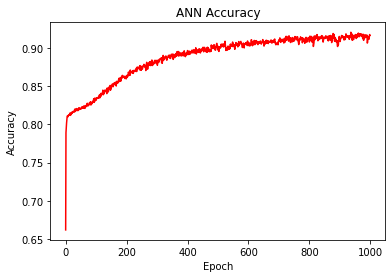

In [21]:
plt.plot(history.history['accuracy'], color='r')
plt.title('ANN Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [18]:
#Evaluate the Model
loss, accuracy = model.evaluate(X_test, Y_test)
print("Accuracy= ", accuracy*100)

68/68 [==============================] - 0s 3ms/step - loss: 0.1683 - accuracy: 0.9347
Accuracy=  93.47426295280457
